# 1. Database preparation

## 1.1. Import data

In [1]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="covid19",
    user="covid19",
    password="aluno")

# Open a cursor to perform database operations
cur = conn.cursor()

# Execute a query
cur.execute("select * from agrega_bd")

# Retrieve query results
records = cur.fetchall()

In [2]:
records

[('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Anti-HCV',
  'não reagente'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Volume plaquetário médio',
  '11,8'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Reticulócitos %',
  '1,20'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'C. Cetônicos, urina',
  'negativa'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Urobilinogênio, urina',
  'inferior a 1,0 mg/dL'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'Células Epiteliais, urina',
  'raríssimas'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  82.0,
  'BR',
  'SP',
  'MMMM',
  'Sirio Libanes',
  'DHL',
  '531'),
 ('BDA95D6610B94CD8A7F2952E07B59342',
  'M',
  

## 1.2. Prepare dataframe

In [3]:
import pandas as pd

df = pd.DataFrame(records, columns=["id_paciente", "ic_sexo", "idade", "cd_pais", "cd_uf", "cd_municipio", "de_hospital", "de_analito", "de_resultado"])

df_piv = pd.pivot_table(df, index=["id_paciente", "ic_sexo", "idade", "cd_pais", "cd_uf", "cd_municipio", "de_hospital"], columns=["de_analito"], values=["de_resultado"] , aggfunc='first')

df_final = pd.DataFrame(df_piv.to_records())

df_final.columns = [hdr.replace("(", "") \
                     for hdr in df_final.columns]
df_final.columns = [hdr.replace(")", "") \
                     for hdr in df_final.columns]
df_final.columns = [hdr.replace("'de_resultado', '", "") \
                     for hdr in df_final.columns]
df_final.columns = [hdr.replace("'", "") \
                     for hdr in df_final.columns]

# y = df_final.loc[:, 'test_covid']
# x = df_final.pop("test_covid")


# df
# df[df['de_analito'] == 'test_covid']


### 1.2.1 Preparing categorical data

In [4]:
from copy import copy

df_temp = copy(df_final)

categorical_columns = df_final.select_dtypes('object').columns

for col in categorical_columns:
    df_final[col] = pd.Categorical(df_final[col]).codes

df_final

,id_paciente,ic_sexo,idade,cd_pais,cd_uf,cd_municipio,de_hospital,17-Alfa-Hidroxiprog.,183,25OH-Vitamina D Total,...,pO2 arterial,pO2 venoso,test_covid,v.Willebrand,Ácid Vanil-Mandélico,Ácido Valpróico,"Ácido ascorbico, plasma",Ácido fólico,Ácido Úrico,Índice de Green & King
0,0,1,64.0,0,12,3,0,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
1,1,1,30.0,0,12,4,0,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2,2,1,50.0,0,13,3,0,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,3,0,31.0,0,12,4,0,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
4,4,1,27.0,0,12,3,0,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2981,0,28.0,0,12,4,0,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2982,2982,0,40.0,1,13,4,0,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2983,2983,1,47.0,0,12,4,0,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
2984,2984,1,38.0,0,2,0,0,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1


# 2. Decision tree classifier

In [ ]:
import numpy as np

y_true = df_temp.loc[:, 'test_covid']
y_code = new_df.loc[:, 'test_covid']


test = [y_code.values.tolist(), y_true.values.tolist()]

classes = np.unique(np.array(test).T, axis=0).T


In [5]:
new_df = df_final

y = new_df.loc[:, 'test_covid'].values.reshape(-1, 1)
x = new_df.loc[:, df_final.columns != 'test_covid']



In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred, average='micro'))
# print("average_precision:",metrics.average_precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred, average='micro'))

Accuracy: 0.6104910714285714
recall: 0.6104910714285714
f1: 0.6104910714285714


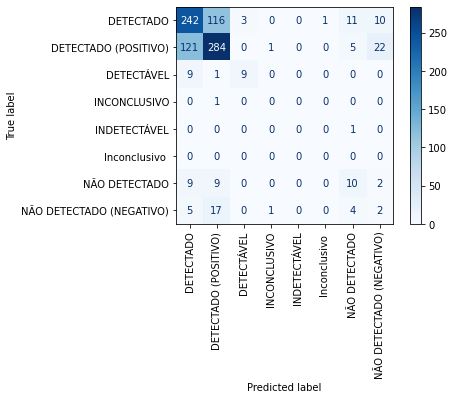

In [34]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=classes[1],
                                 cmap=plt.cm.Blues,
                                 xticks_rotation='vertical')
plt.show()


In [8]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

In [9]:
df_final.loc[:, df_final.columns != 'test_covid']

,id_paciente,ic_sexo,idade,cd_pais,cd_uf,cd_municipio,de_hospital,17-Alfa-Hidroxiprog.,183,25OH-Vitamina D Total,...,"pH, urina 1J",pO2 arterial,pO2 venoso,v.Willebrand,Ácid Vanil-Mandélico,Ácido Valpróico,"Ácido ascorbico, plasma",Ácido fólico,Ácido Úrico,Índice de Green & King
0,0,1,64.0,0,12,3,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,30.0,0,12,4,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,2,1,50.0,0,13,3,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,3,0,31.0,0,12,4,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,4,1,27.0,0,12,3,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2981,0,28.0,0,12,4,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2982,2982,0,40.0,1,13,4,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2983,2983,1,47.0,0,12,4,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2984,2984,1,38.0,0,2,0,0,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [36]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes[1]))


Accuracy: 0.61

Micro Precision: 0.61
Micro Recall: 0.61
Micro F1-score: 0.61

Macro Precision: 0.30
Macro Recall: 0.27
Macro F1-score: 0.28

Weighted Precision: 0.62
Weighted Recall: 0.61
Weighted F1-score: 0.61

Classification Report

                          precision    recall  f1-score   support

               DETECTADO       0.63      0.63      0.63       383
    DETECTADO (POSITIVO)       0.66      0.66      0.66       433
              DETECTÁVEL       0.75      0.47      0.58        19
            INCONCLUSIVO       0.00      0.00      0.00         1
            INDETECTÁVEL       0.00      0.00      0.00         1
           Inconclusivo        0.00      0.00      0.00         0
           NÃO DETECTADO       0.32      0.33      0.33        30
NÃO DETECTADO (NEGATIVO)       0.06      0.07      0.06        29

                accuracy                           0.61       896
               macro avg       0.30      0.27      0.28       896
            weighted avg       0.6

/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aluno/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
